<center><h1> Zomato Restaurant Analysis </h1></center>

<img src='zomato.jpg' width='700' height='600' />

**The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant**

### Data Description :
 - **url**     : contains the url of the restaurant in the zomato website
 - **address** : contains the address of the restaurant in Bengaluru
 - **name**    : contains the name of the restaurant
 - **online_order** : whether online ordering is available in the restaurant or not
 - **book_table** : table book option available or not
 - **rate** : contains the overall rating of the restaurant out of 5
 - **votes** : contains total number of rating for the restaurant as of the above mentioned date
 - **phone** : contains the phone number of the restaurant
 - **location** : contains the neighborhood in which the restaurant is located
 - **rest_type** : restaurant type
 - **dish_liked** : dishes people liked in the restaurant
 - **cuisines** : food styles, separated by comma
 - **approx_cost(for two people)** : contains the approximate cost for meal for two people
 - **reviews_list** : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
 - **menu_item**: contains list of menus available in the restaurant
 - **listed_in(type)** : type of meal
 - **listed_in(city)** : contains the neighborhood in which the restaurant is listed

##  Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

import dexplot

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

In [6]:
from sklearn.metrics import r2_score

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [8]:
data = pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
data.shape

(51717, 17)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


In [12]:
data.describe(include='object').T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/the-konkan-se...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


In [13]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:
(data.isnull().sum()/len(data))*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [15]:
data[data.duplicated()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [16]:
len(data['menu_item'].unique())

9098

## Exploratory Data Analysis

`1` :  **Plot of the Restaurant they are accepting the Online order or Not**

Text(0.5, 1.0, 'Restaurants provides Online order or Not')

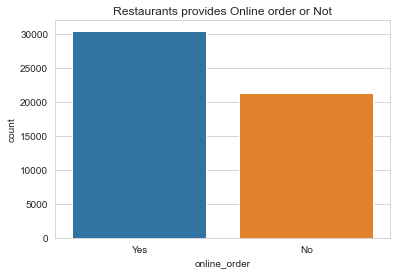

In [17]:
sns.countplot(data['online_order'])
plt.title('Restaurants provides Online order or Not')

`2` :  **Plot of the Restaurant that provides Table Booking or Not**

Text(0.5, 1.0, 'Restaurants provides Table Booking or Not')

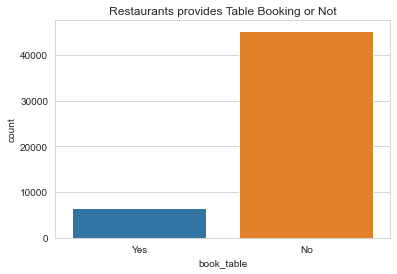

In [18]:
sns.countplot(data['book_table'])
plt.title('Restaurants provides Table Booking or Not')

`3` :  **Plot of the specific type of meals available in Restaurants of the cities**

In [19]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [20]:
data['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [21]:
data['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [22]:
data['listed_in(city)'].value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: listed_in(city), dtype: int64

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


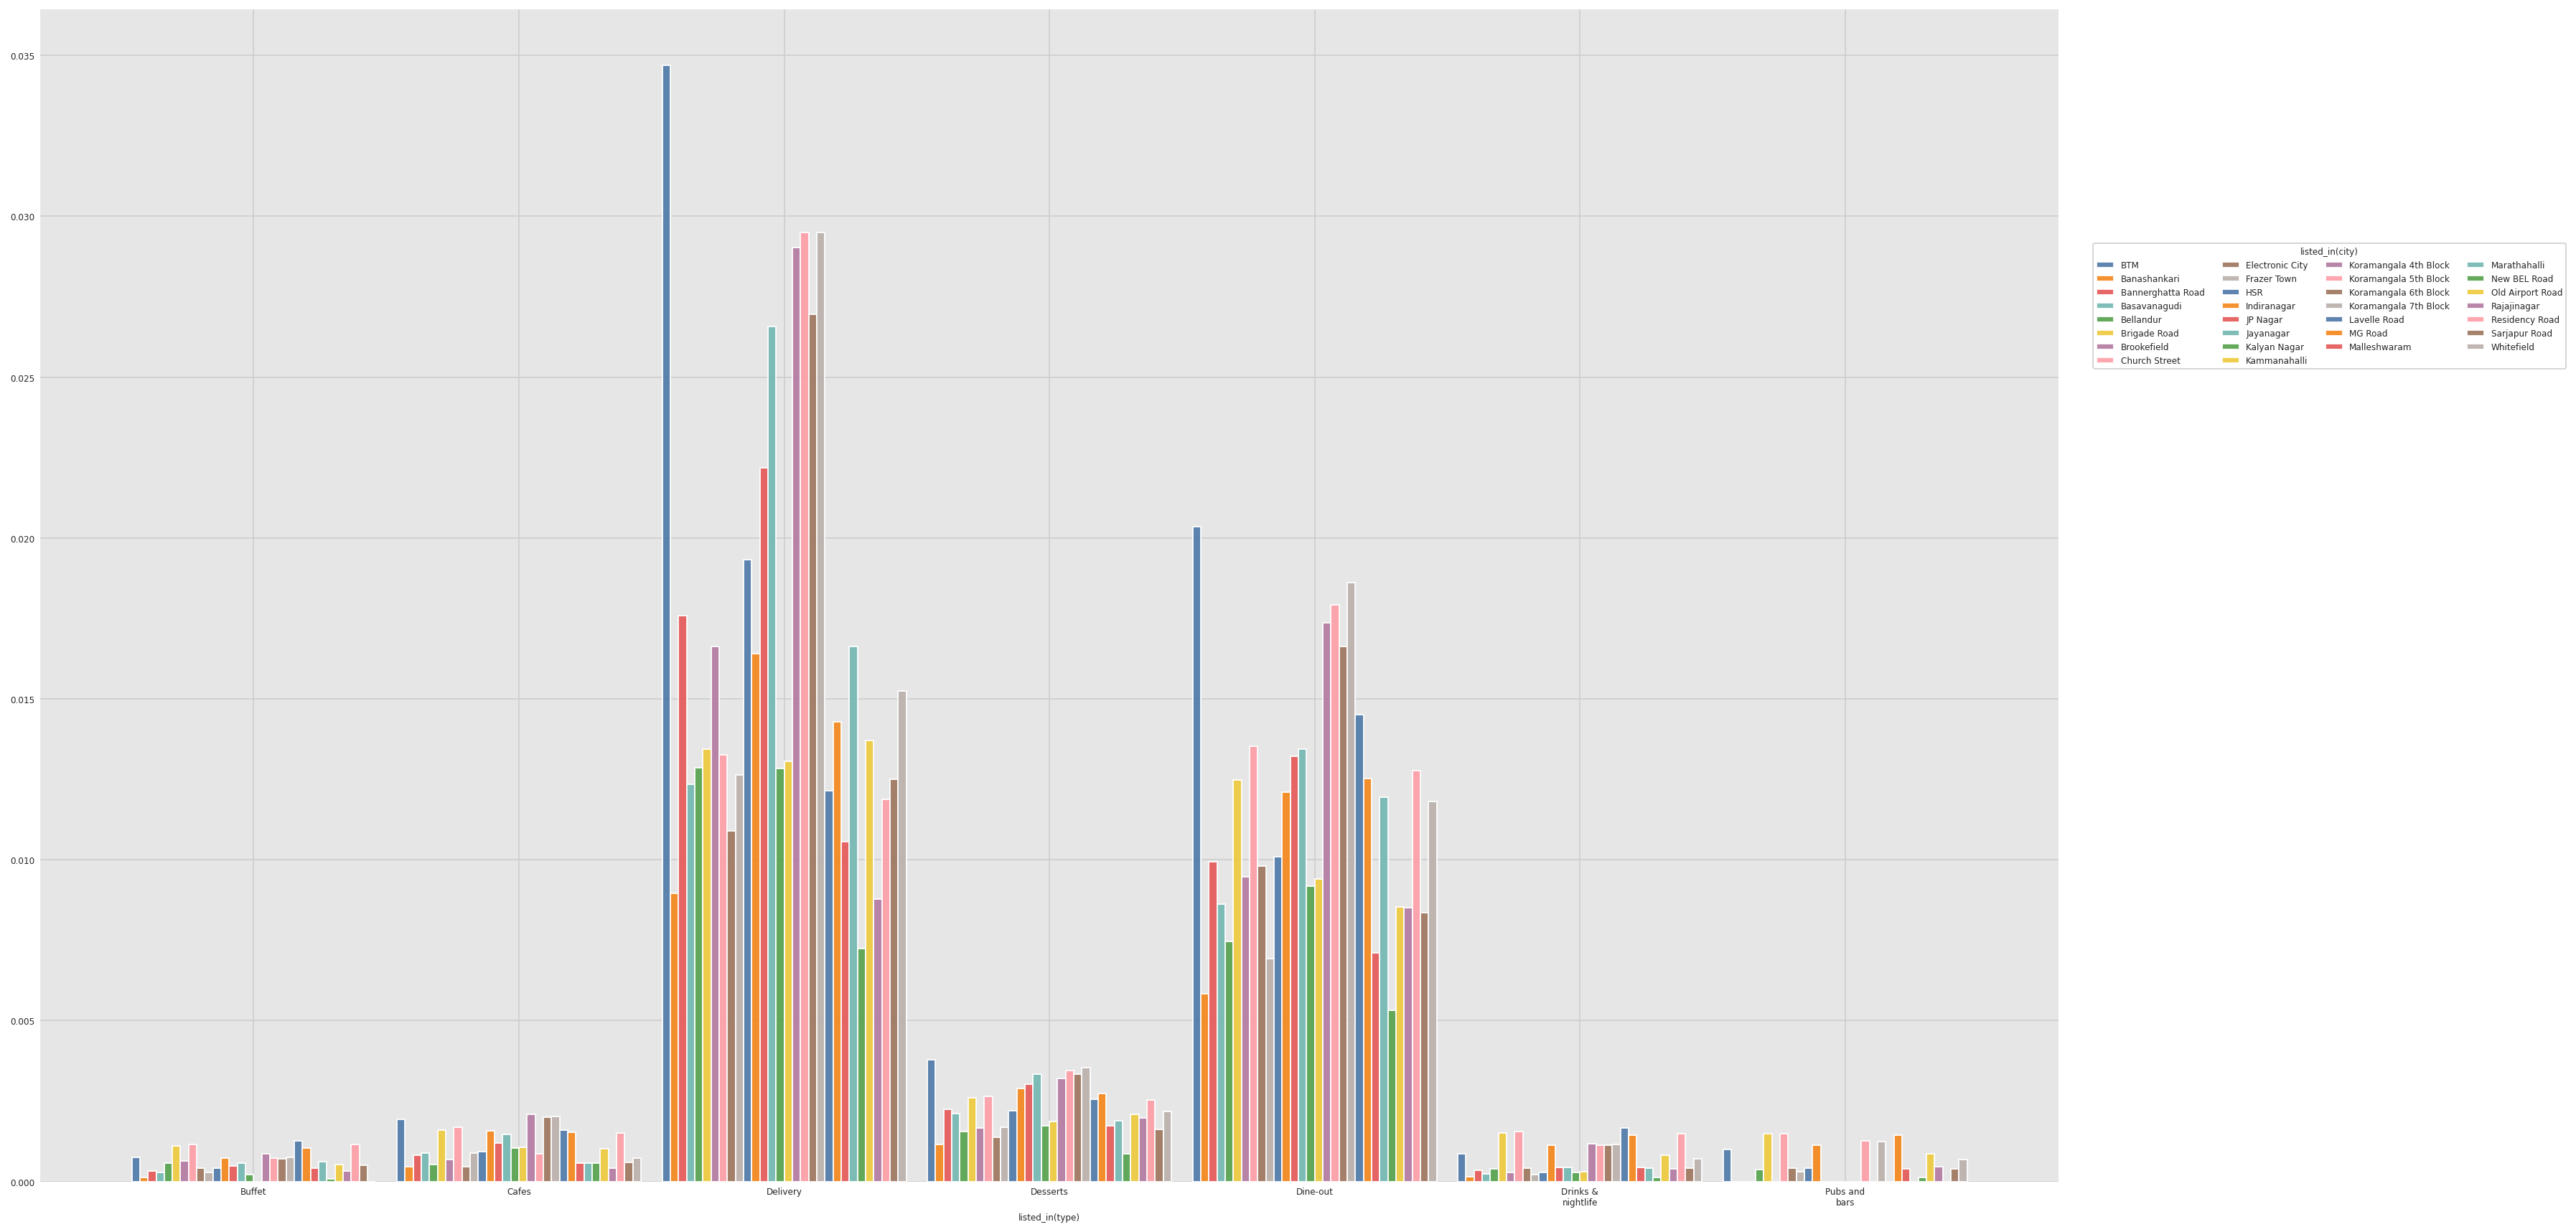

In [23]:
dexplot.count(
               val   = 'listed_in(type)' ,
               split = 'listed_in(city)' ,
               data  =  data             ,
               figsize   = (20,12)        ,
               normalize = True          
              )

`4` : **Plotting for the Top Restuarant in the Bengaluru**

In [24]:
# top 10 
rest_name = data['name'].value_counts()[:10]
rest_name

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Name: name, dtype: int64

Text(0.5, 1.0, 'Famous Restaurants in the City of Bengaluru')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


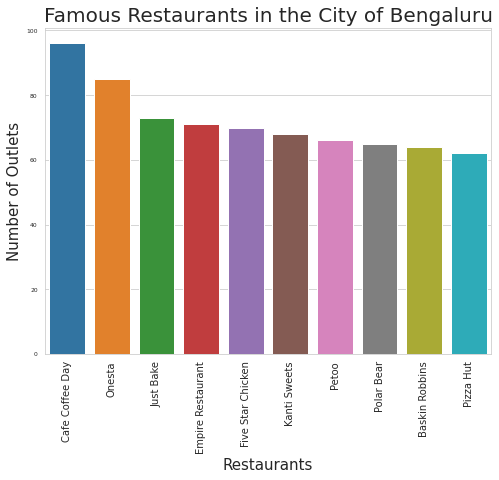

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x = rest_name.index ,y = rest_name)

plt.xticks(fontsize=10, rotation=90)

plt.xlabel('Restaurants' , fontsize=15)
plt.ylabel('Number of Outlets' , fontsize=15)

plt.title("Famous Restaurants in the City of Bengaluru" , fontsize=20)

`5 ` : **Restaurant Type**

Text(0.5, 1.0, 'Restaurants delivering online or Not')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


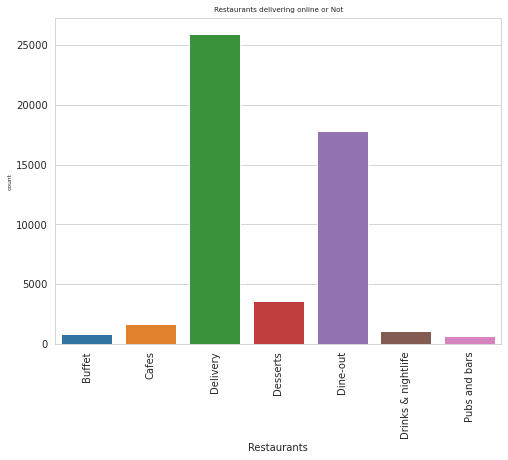

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data['listed_in(type)'])

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.xlabel('Restaurants' ,fontsize=10)

plt.title('Restaurants delivering online or Not')

`6` : **Handling Missing Value in Rate**

In [27]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
len(data['rate'].unique())

65

In [29]:
data['rate'] = data['rate'].replace(['-','NEW',np.NaN] ,'0.0/5')

In [30]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0.0/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
data['rate'] = data['rate'].apply(lambda x:float(x[0:3]))

<AxesSubplot:xlabel='rate', ylabel='count'>

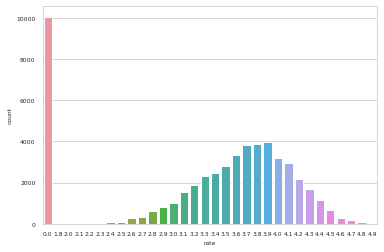

In [32]:
sns.countplot(data['rate'])

<AxesSubplot:xlabel='rate', ylabel='Density'>

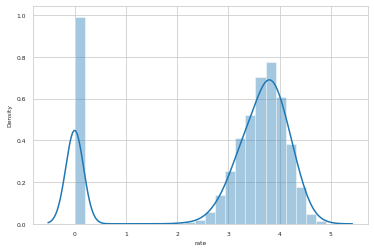

In [33]:
sns.distplot(data['rate'] ,bins=25)

`7` : **Handling Missing Value in Location**

In [34]:
data['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
Yelahanka                   6
West Bangalore              6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [35]:
len(data['location'].unique())

94

In [36]:
cond = data.groupby('location')['rate'].count() / len(data)
cond = cond[cond>0.001].index
data['location'] = np.where(data['location'].isin(cond) , data['location'] ,'Rare_var')

In [37]:
data['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
RT Nagar                   80
Vijay Nagar                80
Sanjay Nagar               76
Sadashiv Nagar             63
Sahakara Nagar             53
Name: location, Length: 72, dtype: int64

`8` : **Handling Remaining Missing Value** 

In [38]:
data.isnull().sum() 

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                           0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [39]:
data = data.drop(['url','phone','dish_liked'] ,axis=1)

In [40]:
data.shape

(51717, 14)

In [41]:
data = data.dropna()

In [42]:
data.shape

(51148, 14)

In [43]:
data.isnull().sum() 

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

`9` : **approx_cost(for two people)**

In [44]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [45]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x:int(x.replace(',','')))

In [46]:
data['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

`10` : **Name Column** 

In [47]:
len(data['name'].unique())

8723

In [48]:
count = data['name'].value_counts()

In [49]:
data['name'] = data['name'].apply(lambda x :x  if count[x]>3  else 'Rare')

In [50]:
len(data['name'].unique())

4885

`11` : **Scaling and Encoding**

In [51]:
data['online_order'] = data['online_order'].replace(('Yes','No'),(1 ,0))

In [52]:
data['book_table']   = data['book_table'].replace(('Yes','No'),(1 ,0))

In [53]:
data['votes'].value_counts()[0:10]

0     9863
4     1130
6      984
7      858
9      735
11     687
5      662
8      620
10     617
16     525
Name: votes, dtype: int64

In [54]:
data = data.drop(['address'] ,axis=1)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51148 non-null  object 
 1   online_order                 51148 non-null  int64  
 2   book_table                   51148 non-null  int64  
 3   rate                         51148 non-null  float64
 4   votes                        51148 non-null  int64  
 5   location                     51148 non-null  object 
 6   rest_type                    51148 non-null  object 
 7   cuisines                     51148 non-null  object 
 8   approx_cost(for two people)  51148 non-null  int64  
 9   reviews_list                 51148 non-null  object 
 10  menu_item                    51148 non-null  object 
 11  listed_in(type)              51148 non-null  object 
 12  listed_in(city)              51148 non-null  object 
dtypes: float64(1), i

In [56]:
col = ['votes' ,'approx_cost(for two people)']

In [57]:
sc = StandardScaler()

In [58]:
data[col] = sc.fit_transform(data[col])

In [59]:
col = ['name' ,'location' ,'rest_type' ,'cuisines' ,'reviews_list' ,'menu_item' ,'listed_in(type)' ,'listed_in(city)']

In [60]:
for feat in col:
    data[feat] = data[feat].factorize()[0]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51148 non-null  int64  
 1   online_order                 51148 non-null  int64  
 2   book_table                   51148 non-null  int64  
 3   rate                         51148 non-null  float64
 4   votes                        51148 non-null  float64
 5   location                     51148 non-null  int64  
 6   rest_type                    51148 non-null  int64  
 7   cuisines                     51148 non-null  int64  
 8   approx_cost(for two people)  51148 non-null  float64
 9   reviews_list                 51148 non-null  int64  
 10  menu_item                    51148 non-null  int64  
 11  listed_in(type)              51148 non-null  int64  
 12  listed_in(city)              51148 non-null  int64  
dtypes: float64(3), i

In [62]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,1,1,4.1,0.607675,0,0,0,0.555012,0,0,0,0
1,1,1,0,4.1,0.622554,0,0,1,0.555012,1,0,0,0
2,2,1,0,3.8,0.784987,0,1,2,0.555012,2,0,0,0
3,3,0,0,3.7,-0.244167,0,2,3,-0.582512,3,0,0,0
4,4,0,0,3.8,-0.147452,1,0,4,0.100003,4,0,0,0


## Models

In [63]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [64]:
X = data.drop(['rate'] ,axis=1)
y = data['rate']

`12` :  **Correlation between different variables**

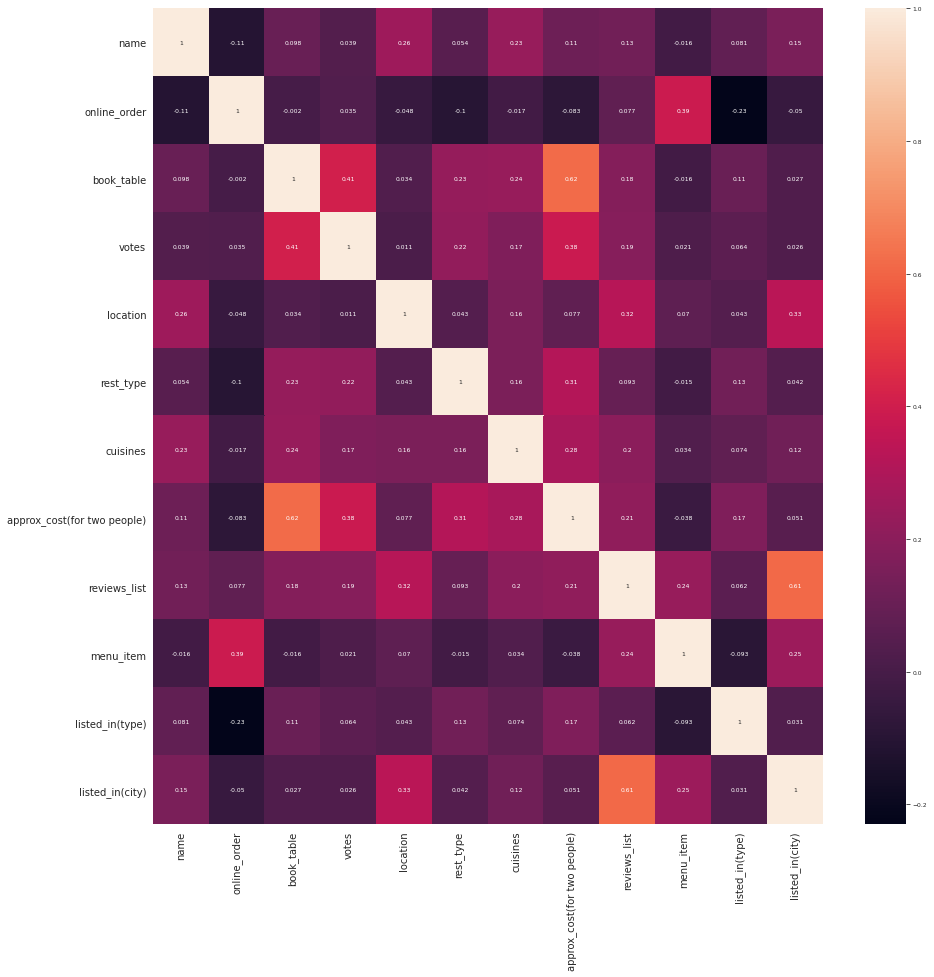

In [65]:
plt.figure(figsize=(15,15))

sns.heatmap( X.corr() ,annot=True)

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10);

In [66]:
X = X.drop(['listed_in(type)'] ,axis=1)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

`1. LinearRegression`

In [68]:
lr = LinearRegression() 

In [69]:
lr.fit(X_train ,y_train)

LinearRegression()

In [70]:
lr_pred = lr.predict(X_test)

In [71]:
lr_score = r2_score(y_test ,lr_pred)
lr_score

0.3353064964186194

`2. DecisionTreeRegressor`

In [72]:
dt = DecisionTreeRegressor(
                            criterion='mse',
                            splitter='best',
                          )

In [73]:
dt.fit(X_train ,y_train)

DecisionTreeRegressor()

In [74]:
dt_pred = dt.predict(X_test)

In [75]:
dt_score = r2_score(y_test ,dt_pred)
dt_score

0.9716084602959498

`3. RandomForestRegressor`

In [76]:
rf = RandomForestRegressor(
                            n_estimators=600, 
                            criterion='mse', 
                            min_samples_split=2
                          )

In [77]:
rf.fit(X_train ,y_train)

RandomForestRegressor(n_estimators=600)

In [78]:
rf_pred = rf.predict(X_test)

In [79]:
rf_score = r2_score(y_test ,rf_pred)
rf_score

0.9835475827277763

`4. CatBoostRegressor`

In [80]:
cbr = CatBoostRegressor(
                         n_estimators = 200,
                         loss_function = 'MAE',
                         eval_metric = 'RMSE'
                        )

In [81]:
cbr.fit(X_train, y_train);

0:	learn: 1.5975790	total: 298ms	remaining: 59.4s
1:	learn: 1.5532582	total: 309ms	remaining: 30.6s
2:	learn: 1.5084459	total: 318ms	remaining: 20.9s
3:	learn: 1.4654124	total: 326ms	remaining: 16s
4:	learn: 1.4237107	total: 334ms	remaining: 13s
5:	learn: 1.3833853	total: 343ms	remaining: 11.1s
6:	learn: 1.3442712	total: 351ms	remaining: 9.67s
7:	learn: 1.3064727	total: 359ms	remaining: 8.62s
8:	learn: 1.2697902	total: 367ms	remaining: 7.79s
9:	learn: 1.2342915	total: 376ms	remaining: 7.14s
10:	learn: 1.2000467	total: 384ms	remaining: 6.6s
11:	learn: 1.1666539	total: 392ms	remaining: 6.14s
12:	learn: 1.1344174	total: 400ms	remaining: 5.76s
13:	learn: 1.1033174	total: 408ms	remaining: 5.43s
14:	learn: 1.0732506	total: 416ms	remaining: 5.13s
15:	learn: 1.0441799	total: 424ms	remaining: 4.87s
16:	learn: 1.0160820	total: 431ms	remaining: 4.64s
17:	learn: 0.9888336	total: 439ms	remaining: 4.44s
18:	learn: 0.9624890	total: 448ms	remaining: 4.26s
19:	learn: 0.9370598	total: 455ms	remaining: 4

164:	learn: 0.3236221	total: 1.52s	remaining: 324ms
165:	learn: 0.3235961	total: 1.53s	remaining: 314ms
166:	learn: 0.3235403	total: 1.54s	remaining: 305ms
167:	learn: 0.3234822	total: 1.55s	remaining: 295ms
168:	learn: 0.3234513	total: 1.55s	remaining: 285ms
169:	learn: 0.3234349	total: 1.56s	remaining: 276ms
170:	learn: 0.3233982	total: 1.57s	remaining: 266ms
171:	learn: 0.3233440	total: 1.58s	remaining: 257ms
172:	learn: 0.3232828	total: 1.58s	remaining: 247ms
173:	learn: 0.3232561	total: 1.59s	remaining: 238ms
174:	learn: 0.3231880	total: 1.6s	remaining: 228ms
175:	learn: 0.3231359	total: 1.6s	remaining: 219ms
176:	learn: 0.3230926	total: 1.61s	remaining: 209ms
177:	learn: 0.3230597	total: 1.62s	remaining: 200ms
178:	learn: 0.3230071	total: 1.63s	remaining: 191ms
179:	learn: 0.3229567	total: 1.63s	remaining: 181ms
180:	learn: 0.3229358	total: 1.64s	remaining: 172ms
181:	learn: 0.3229121	total: 1.65s	remaining: 163ms
182:	learn: 0.3228862	total: 1.65s	remaining: 154ms
183:	learn: 0.

In [82]:
cbr_pred = cbr.predict(X_test)

In [83]:
cbr_score = r2_score(y_test,cbr_pred)
cbr_score

0.9529973420875437

## Conclusion

In [85]:
model = pd.DataFrame({
                       'Model' : ['Linear Regression' ,'Decision Tree Regressor' ,'Random Forest Regressor' ,'CatBoost Regressor'],
                       'R2 Score' : [lr_score ,dt_score ,rf_score ,cbr_score]
                     })

model.set_index('Model')

,R2 Score
Model,
Linear Regression,0.335306
Decision Tree Regressor,0.971608
Random Forest Regressor,0.983548
CatBoost Regressor,0.952997
